### CÁLCULO DO POLINÓMIO DE LAGRANGE DIVIDIDAS

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sympy


##### função para calcular as diferenças divididas

In [17]:
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    # a primeira coluna de  y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i]) 
    return coef

##### calcular o valor da função polinomial para cada ponto x

In [18]:
def newton_poly(coef, x_data, x):
    X=sympy.symbols('x')
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

##### calcular a função polinomial interpoladora

In [19]:
def newton_poly_expand(coef, x_data):
    '''
    evaluate the newton polynomial 
    at x
    '''
    x=sympy.symbols('x')
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

In [20]:
x = np.array([1,2,3])
y = np.array([0.5,1,3.5])

##### obter os coeficientes das diferenças divididas

In [21]:
aux = divided_diff(x, y)
print(aux)
a_s = divided_diff(x, y)[0, :]

[[0.5 0.5 1. ]
 [1.  2.5 0. ]
 [3.5 0.  0. ]]


##### cálculo dos novos pontos

In [22]:
x_new = np.arange(0, 4, .1)
y_new = newton_poly(a_s, x, x_new)

##### polinómio expandido

In [23]:
pol = newton_poly_expand(a_s, x)
pol=sympy.expand(pol)
print(pol)

1.0*x**2 - 2.5*x + 2.0


##### gráfico da função interpoladora

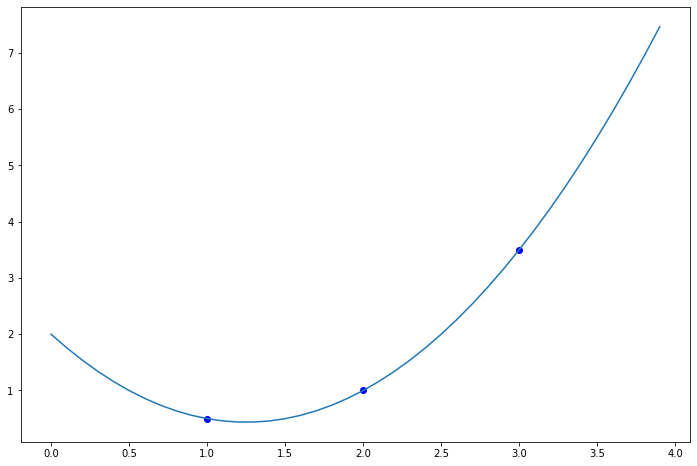

In [24]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)
plt.show()